# Recognising digits

Represent these patterns as vectors to store them in a Hopfield network using Hebb's rule (with $w_{ii}=0$). Use a typewriter scheme to index the bits, starting from the top row and going from left to right in each row.

Below you are given three different patterns to feed into the network. For each of these, iterate asynchronous determistic updates of the network using the typewriter scheme explained above. Stop when you reach a steady state, and answer the questions below. If, at some update, you encounter sgn(0), then simply set sgn(0)=1.

For each of the three experiments you are asked two questions: (A) To which pattern does your network converge? (B) Classify this pattern using the following scheme: if the pattern you obtain correspods to any of the stored patterns $x^{(\mu)}$, enter the pattern $\mu$ (for example, you enter 1 if you retrieve digit 0). If your network retrieves an inverted stored pattern, then enter $\mu$ (for example, you enter −1 if you get the inverted digit 0). If you get anything else, enter 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Patterns and their from in typewriter format
x1=[ [ -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, 1, 1, 1, -1, -1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] ]
x1_tw = np.array(sum(x1, []))
x2=[ [ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1],[ -1, -1, -1, 1, 1, 1, 1, -1, -1, -1] ]
x2_tw = np.array(sum(x2, []))
x3=[ [ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, -1, -1, -1, -1, -1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1],[ 1, 1, 1, 1, 1, 1, 1, 1, -1, -1] ]
x3_tw = np.array(sum(x3, []))
x4=[ [ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, -1, 1, 1, 1, 1, 1, 1, -1, -1] ]
x4_tw = np.array(sum(x4,[]))
x5=[ [ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, -1, -1, -1, -1, 1, 1, -1],[ -1, 1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, 1, 1, 1, 1, 1, 1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1],[ -1, -1, -1, -1, -1, -1, -1, 1, 1, -1] ]
x5_tw = np.array(sum(x5, []))
    
#Create weights matrix according to hebbs rule
weights = x1_tw[:,None]*x1_tw
for el in (x2_tw, x3_tw, x4_tw, x5_tw):
    weights = weights + el[:,None]*el
#Divide by the number of neurons
weights = np.true_divide(weights, len(x1_tw))
np.fill_diagonal(weights,0)

def update_epoch(S, w):

    changed = False
    for i in range(len(S)):
        S_i_old = S[i]
        #Update a single neuron
        S[i] = esign(np.dot(weights[i], S))
        #Check if a single neuron has changed
        changed = changed or (S_i_old != S[i])
    return changed


def esign(x):

    if(x == 0):
        return 1
    else:
        return np.sign(x)


## Question 1A

 Feed this pattern:

[[-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [1, 1, 1, 1, 1, 1, 1, -1, -1, 1], [1, 1, 1, 1, 1, 1, 1, -1, -1, 1]]

The format of the above pattern is $[[S_1,S_2,\ldots,S_{10}],[S_{11},\ldots,S_{20}],\ldots,[S_{151},\ldots,S_{160}]]$, where [$[S_1,S_2,\ldots,S_{10}]$ corresponds to the top row, from left to right. 

 Enter the steady pattern that your network reaches when you feed the above pattern: 

In [2]:
pattern =   [[-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [-1, -1, -1, -1, -1, -1, -1, 1, 1, -1], [1, 1, 1, 1, 1, 1, 1, -1, -1, 1], [1, 1, 1, 1, 1, 1, 1, -1, -1, 1]] 
pattern_tw = np.array(sum(pattern, []))
loop = update_epoch(pattern_tw, weights)
while loop:
    loop = update_epoch(pattern_tw, weights)
pattern_2d = np.reshape(pattern_tw,(16,10))
pattern_2d

array([[-1,  1,  1, -1, -1, -1, -1,  1,  1, -1],
       [-1,  1,  1, -1, -1, -1, -1,  1,  1, -1],
       [-1,  1,  1, -1, -1, -1, -1,  1,  1, -1],
       [-1,  1,  1, -1, -1, -1, -1,  1,  1, -1],
       [-1,  1,  1, -1, -1, -1, -1,  1,  1, -1],
       [-1,  1,  1, -1, -1, -1, -1,  1,  1, -1],
       [-1,  1,  1, -1, -1, -1, -1,  1,  1, -1],
       [-1,  1,  1,  1,  1,  1,  1,  1,  1, -1],
       [-1,  1,  1,  1,  1,  1,  1,  1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1, -1]])

## Question 1B

 Classify the pattern you obtained (enter one of the following: ±1,±2,±3,±4,±5,6)

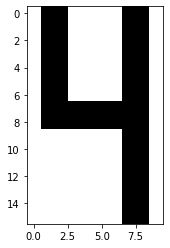

In [4]:
plt.imshow(-pattern_2d, cmap='gray', vmin=-1, vmax=1)
plt.show()


## Question 2A

 Feed this pattern (same format as above):

[[1, -1, 1, 1, -1, -1, -1, -1, 1, 1], [-1, 1, 1, 1, -1, 1, -1, -1, 1, -1], [-1, 1, -1, -1, -1, 1, -1, 1, -1, 1], [-1, 1, -1, 1, -1, 1, 1, 1, -1, 1], [-1, 1, 1, 1, 1, -1, -1, -1, 1, 1], [1, -1, 1, 1, -1, -1, -1, 1, -1, 1], [1, -1, -1, -1, 1, 1, -1, -1, -1, 1], [1, -1, -1, 1, 1, -1, -1, 1, -1, 1], [1, -1, -1, 1, 1, 1, -1, -1, 1, 1], [1, 1, 1, -1, 1, -1, -1, 1, -1, 1], [1, -1, 1, -1, 1, -1, 1, -1, 1, -1], [1, -1, 1, -1, -1, 1, -1, 1, -1, -1], [1, 1, -1, -1, -1, -1, 1, 1, -1, 1], [-1, 1, -1, -1, -1, 1, -1, 1, -1, 1], [-1, -1, -1, -1, -1, 1, 1, -1, 1, -1], [1, -1, -1, 1, -1, 1, -1, -1, -1, -1]] 

 Enter the steady pattern that your network reaches when you feed the above pattern: 

In [7]:
pattern =  [[1, -1, 1, 1, -1, -1, -1, -1, 1, 1], [-1, 1, 1, 1, -1, 1, -1, -1, 1, -1], [-1, 1, -1, -1, -1, 1, -1, 1, -1, 1], [-1, 1, -1, 1, -1, 1, 1, 1, -1, 1], [-1, 1, 1, 1, 1, -1, -1, -1, 1, 1], [1, -1, 1, 1, -1, -1, -1, 1, -1, 1], [1, -1, -1, -1, 1, 1, -1, -1, -1, 1], [1, -1, -1, 1, 1, -1, -1, 1, -1, 1], [1, -1, -1, 1, 1, 1, -1, -1, 1, 1], [1, 1, 1, -1, 1, -1, -1, 1, -1, 1], [1, -1, 1, -1, 1, -1, 1, -1, 1, -1], [1, -1, 1, -1, -1, 1, -1, 1, -1, -1], [1, 1, -1, -1, -1, -1, 1, 1, -1, 1], [-1, 1, -1, -1, -1, 1, -1, 1, -1, 1], [-1, -1, -1, -1, -1, 1, 1, -1, 1, -1], [1, -1, -1, 1, -1, 1, -1, -1, -1, -1]] 
pattern_tw = np.array(sum(pattern, []))
loop = update_epoch(pattern_tw, weights)
while loop:
    loop = update_epoch(pattern_tw, weights)
pattern_2d = np.reshape(pattern_tw,(16,10))
pattern_2d

array([[ 1,  1,  1, -1, -1, -1, -1,  1,  1,  1],
       [ 1,  1,  1, -1, -1, -1, -1,  1,  1,  1],
       [ 1,  1,  1, -1, -1, -1, -1, -1,  1,  1],
       [ 1,  1,  1, -1,  1, -1, -1, -1,  1,  1],
       [ 1,  1,  1, -1,  1, -1, -1, -1,  1,  1],
       [ 1,  1,  1, -1,  1, -1, -1, -1,  1,  1],
       [ 1,  1,  1, -1,  1, -1, -1, -1,  1,  1],
       [ 1,  1, -1, -1, -1, -1, -1, -1,  1,  1],
       [ 1,  1, -1, -1, -1, -1, -1, -1,  1,  1],
       [ 1,  1,  1, -1,  1,  1, -1,  1,  1,  1],
       [ 1,  1,  1, -1,  1,  1, -1,  1,  1,  1],
       [ 1,  1,  1, -1,  1,  1, -1,  1,  1,  1],
       [ 1,  1,  1, -1,  1,  1, -1,  1,  1,  1],
       [ 1,  1,  1, -1, -1, -1, -1,  1,  1,  1],
       [ 1,  1,  1, -1, -1, -1, -1,  1,  1,  1],
       [ 1,  1,  1, -1, -1, -1, -1,  1,  1,  1]])

## Question 2B

 Classify the pattern you obtained (enter one of the following: ±1,±2,±3,±4,±5,6)

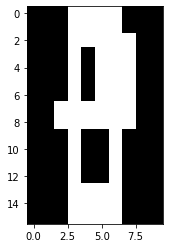

In [8]:
plt.imshow(-pattern_2d, cmap='gray', vmin=-1, vmax=1)
plt.show()

## Question 3A

 Feed this pattern (same format as above):

[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1], [1, 1, 1, -1, -1, -1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]] 

 Enter the steady pattern that your network reaches when you feed the above pattern: 

In [11]:
pattern =  [[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1], [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, 1, 1, 1, -1, -1, 1, 1, 1, -1], [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1], [1, 1, 1, -1, -1, -1, -1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]] 
pattern_tw = np.array(sum(pattern, []))
loop = update_epoch(pattern_tw, weights)
while loop:
    loop = update_epoch(pattern_tw, weights)
pattern_2d = np.reshape(pattern_tw,(16,10))
pattern_2d


array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1,  1,  1,  1,  1, -1, -1, -1],
       [-1, -1,  1,  1,  1,  1,  1,  1, -1, -1],
       [-1,  1,  1,  1, -1, -1,  1,  1,  1, -1],
       [-1,  1,  1,  1, -1, -1,  1,  1,  1, -1],
       [-1,  1,  1,  1, -1, -1,  1,  1,  1, -1],
       [-1,  1,  1,  1, -1, -1,  1,  1,  1, -1],
       [-1,  1,  1,  1, -1, -1,  1,  1,  1, -1],
       [-1,  1,  1,  1, -1, -1,  1,  1,  1, -1],
       [-1,  1,  1,  1, -1, -1,  1,  1,  1, -1],
       [-1,  1,  1,  1, -1, -1,  1,  1,  1, -1],
       [-1,  1,  1,  1, -1, -1,  1,  1,  1, -1],
       [-1,  1,  1,  1, -1, -1,  1,  1,  1, -1],
       [-1, -1,  1,  1,  1,  1,  1,  1, -1, -1],
       [-1, -1, -1,  1,  1,  1,  1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

## Question 3B 

 Classify the pattern you obtained (enter one of the following: ±1,±2,±3,±4,±5,6)

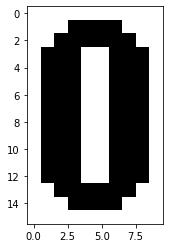

In [12]:
plt.imshow(-pattern_2d, cmap='gray', vmin=-1, vmax=1)
plt.show()